This is the Python notebook, where we perform EDA on the data of cuisines and ingredients and use our findings to built different machine learning models to enable the prediction of a cuisine based on the ingredients provided.

In [1]:
#Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the input data
train_df = pd.read_json("./train.json")


In [3]:
train_df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


EDA SECTION

C:\Users\SRIKARTHIK\AppData\Local\Temp\ipykernel_5188\651055631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cuisine', data=train_df, palette='Paired')


<Axes: xlabel='cuisine', ylabel='count'>

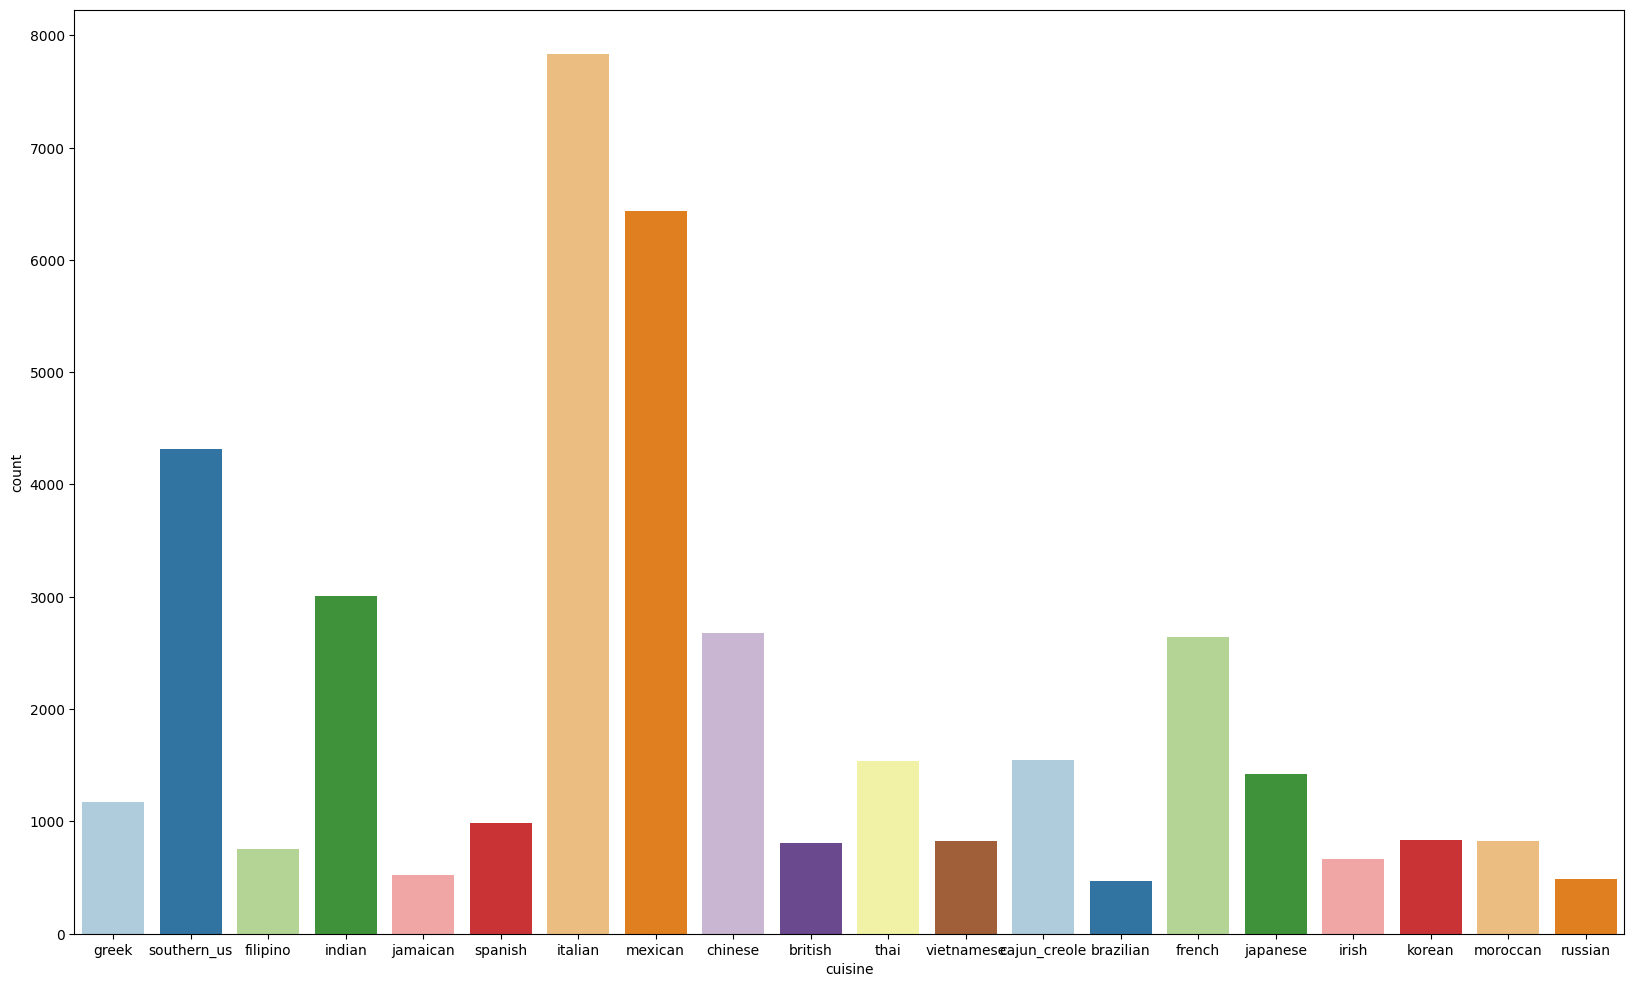

In [9]:
#Let us build a count plot to analyze the count of the number dishes in each cuisine
plt.figure(figsize=(20, 12))
sns.countplot(x='cuisine', data=train_df, palette='Paired')

In [53]:
all_ingredients = [ingredient for i in train_df['ingredients'] for ingredient in i]


In [55]:
df_vc= pd.DataFrame(all_ingredients,columns=["ingredients"])

In [60]:
df_valuecount = df_vc.value_counts().reset_index()

In [62]:
df_valuecount

,ingredients,count
0,salt,18049
1,olive oil,7972
2,onions,7972
3,water,7457
4,garlic,7380
...,...,...
6709,dark chocolate cocoa powder,1
6710,dark crème de cacao,1
6711,dark lager,1
6712,shishito chile,1


C:\Users\SRIKARTHIK\AppData\Local\Temp\ipykernel_7348\240494811.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ingredients', data=df_valuecount.head(30), palette='viridis')


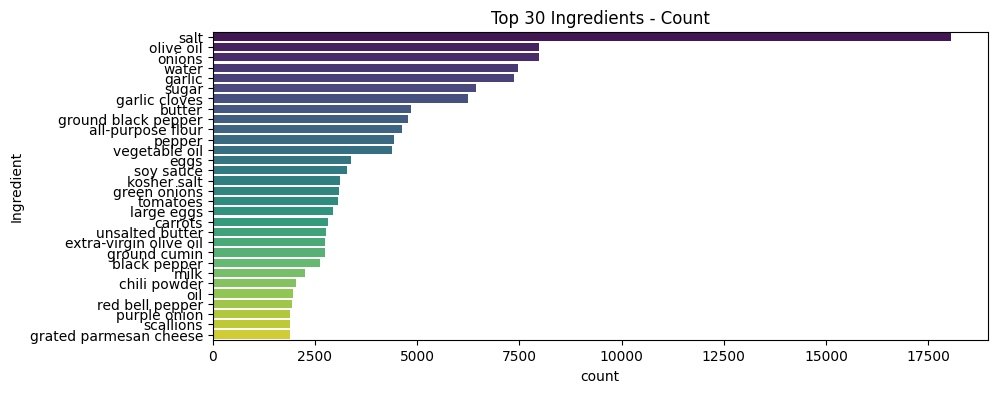

In [71]:
plt.figure(figsize=(10, 4))
sns.barplot(x='count', y='ingredients', data=df_valuecount.head(30), palette='viridis')
plt.title('Top 30 Ingredients - Count')
plt.xlabel('count')
plt.ylabel('Ingredient')
plt.show()

In [214]:
#Let us now build a wordcloud to visualize which cusine uses what kind of ingredients and also display the most commonly occuring cuisines
from wordcloud import WordCloud
from PIL import Image
import numpy as np
#Let us first visualize the wordclouds for the top 4 cuisines

In [106]:
train_df['cuisine'].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [107]:
train_df['cuisine'].unique()
stra=" "
for i in train_df['cuisine'].unique():
    stra += i
    stra += " "
    

In [113]:
wordcloud = WordCloud(width=300, height=200, background_color='white').generate(stra)

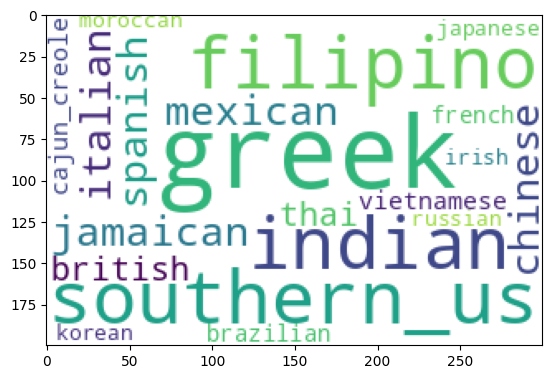

In [114]:
plt.imshow(wordcloud)

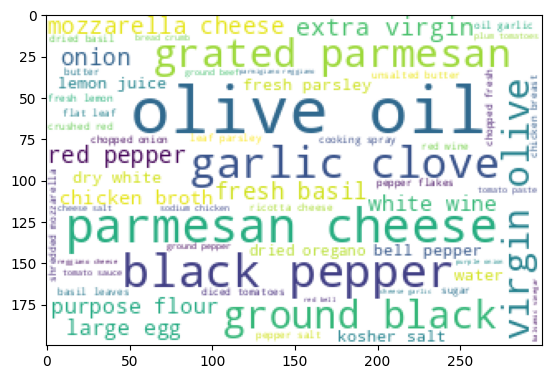

In [143]:
data = train_df[train_df['cuisine']=="italian"]['ingredients'].apply(lambda x : ' '.join(x))
wordcval = ' '.join(data)
wordcloud = WordCloud(width=300, height=200, background_color='white').generate(wordcval)
plt.imshow(wordcloud)

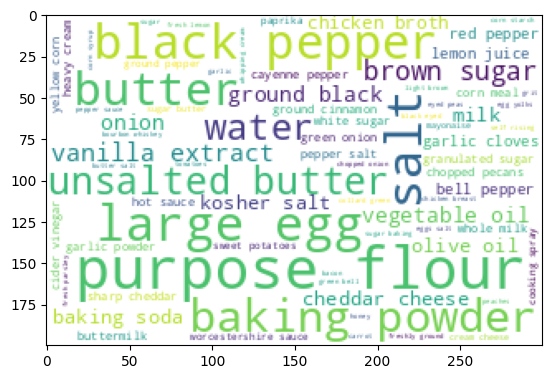

In [141]:
data = train_df[train_df['cuisine']=="southern_us"]['ingredients'].apply(lambda x : ' '.join(x))
wordcval = ' '.join(data)
wordcloud = WordCloud(width=300, height=200, background_color='white').generate(wordcval)
plt.imshow(wordcloud)

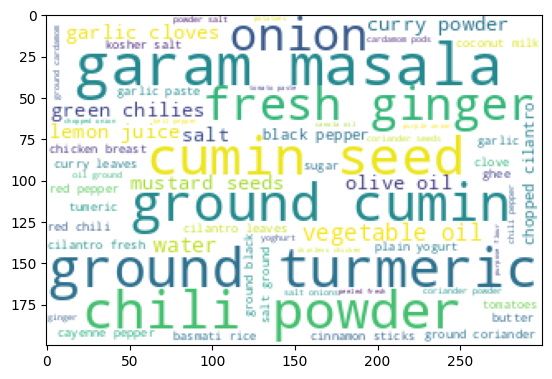

In [142]:
data = train_df[train_df['cuisine']=="indian"]['ingredients'].apply(lambda x : ' '.join(x))
wordcval = ' '.join(data)
wordcloud = WordCloud(width=300, height=200, background_color='white').generate(wordcval)
plt.imshow(wordcloud)

MACHINE LEARNING SECTION

In [4]:
#Now let us build different machine learning models to predict the cuisine of a set of inputted ingredients:
#Let us start with the XGBoost Model
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [5]:
#Let us first convert all our ingredients into a single string for preprocessing -> For label encoding
df= train_df
df['ingredients'] = df['ingredients'].apply(lambda x : ' '.join(x))

#Let us encode the cuisine labels
label_encoder = LabelEncoder()
df['encoded_cuisine'] = label_encoder.fit_transform(df['cuisine'])

In [6]:
df

,id,cuisine,ingredients,encoded_cuisine
0,10259,greek,romaine lettuce black olives grape tomatoes ga...,6
1,25693,southern_us,plain flour ground pepper salt tomatoes ground...,16
2,20130,filipino,eggs pepper salt mayonaise cooking oil green c...,4
3,22213,indian,water vegetable oil wheat salt,7
4,13162,indian,black pepper shallots cornflour cayenne pepper...,7
...,...,...,...,...
39769,29109,irish,light brown sugar granulated sugar butter warm...,8
39770,11462,italian,KRAFT Zesty Italian Dressing purple onion broc...,9
39771,2238,irish,eggs citrus fruit raisins sourdough starter fl...,8
39772,41882,chinese,boneless chicken skinless thigh minced garlic ...,3


In [8]:
#Now we will utilize the CountVectorizer to convert the string of ingredients into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
X=vector.fit_transform(df['ingredients'])

In [9]:
#Now let us split the data for train and test purposes:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,df['encoded_cuisine'],test_size=0.2, random_state=42)

In [10]:
#Let us build and train the XGboost model
model = xgb.XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [181]:
#Let us make our predictions on our X_test
predictions = model.predict(X_test)

In [182]:
predictions

array([ 3, 17,  6, ...,  3,  7, 16], dtype=int64)

In [188]:
#Now let us evaluate the accuracy of the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
accuracy = accuracy_score(y_test,predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

In [189]:
accuracy

0.789566310496543

In [193]:
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.58      0.68        84
           1       0.70      0.43      0.53       157
           2       0.84      0.69      0.76       328
           3       0.78      0.84      0.81       510
           4       0.73      0.57      0.64       136
           5       0.64      0.65      0.65       550
           6       0.73      0.71      0.72       249
           7       0.89      0.88      0.88       602
           8       0.67      0.54      0.60       151
           9       0.79      0.90      0.84      1567
          10       0.88      0.74      0.80        91
          11       0.83      0.73      0.78       284
          12       0.85      0.73      0.79       166
          13       0.90      0.93      0.91      1336
          14       0.86      0.77      0.82       166
          15       0.57      0.47      0.52        89
          16       0.69      0.77      0.73       848
   

In [223]:
#Let us put the XGBoost Model into a single cell for simplicity and funcitonality purposes:

#Let us build and train the XGboost model
model = xgb.XGBClassifier()
model.fit(X_train,y_train)

predictions = model.predict(X_test)

#Let us display the accuracy and classification report
accuracy = accuracy_score(y_test,predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

0.789566310496543

In [208]:
#Now let us try to predict a user inputted set of ingredients: Which follows the same preprocessing steps:
list_ing = ["bread","salt","eggs","jam", "butter"]

In [209]:
list_ing = ' '.join(list_ing)

In [210]:
list_ing

'bread salt eggs jam butter'

In [211]:
#Let us vectorize:
X = vector.transform([list_ing])

In [212]:
predicted_cuisine = model.predict(X)
cuisine = label_encoder.inverse_transform(predicted_cuisine)

In [213]:
cuisine[0]

'southern_us'

In [207]:
#Now let us try build different classification Machine learning models and try to test the accuracy in their predictions

In [217]:
#Let us implement the multinomial naive bayes model
from sklearn.naive_bayes import MultinomialNB

#The model building and prediction is similar to the previous model:

model = MultinomialNB()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

#Let us display the accuracy and classification report
accuracy = accuracy_score(y_test,predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

In [218]:
accuracy

0.7288497800125707

In [229]:
#Now let us develop the GradientBoosting model that builds models sequentially eliminating any errors
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

#Let us display the accuracy and classification report
accuracy = accuracy_score(y_test,predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)


In [230]:
accuracy

0.7541169076052797

In [227]:
#Let us now try the KNN model to understand how much accuracy it is able to produce:
#In this case we use the no of neighbours as 5 which can be made more sophisticated with an analysis on the optimal no of neighbours.
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

#Let us display the accuracy and classification report
accuracy = accuracy_score(y_test,predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)



In [228]:
accuracy

0.6346951602765556

In [231]:
#Let us now try to develop the model with Support machine vectors:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

#Let us display the accuracy and classification report
accuracy = accuracy_score(y_test,predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)


In [232]:
accuracy

0.7781269641734758

In [13]:
#Now let us finish our model building by developing a basic logistic regression model to predict the output.
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

#Let us display the accuracy and classification report
accuracy = accuracy_score(y_test,predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

In [14]:
accuracy

0.7815210559396606

In [37]:
#Let us now create a function that includes all the above mentioned 5 models and try to visualize which model gives us a better accuracy:
#First let us import all the machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb



def cuisine_predictor():
    model_dict = {'xgboost' : xgb.XGBClassifier() ,'multinomial' : MultinomialNB(), 'gradientboost' : GradientBoostingClassifier(n_estimators=100),
                 'knn' : KNeighborsClassifier(n_neighbors=5) , 'svm' : LinearSVC(), 'logreg'  : LogisticRegression(max_iter=1000) }
    list_model=[]
    list_accuracy = []
    for i,n in model_dict.items():
        list_model.append(i)
        n.fit(X_train,y_train)
        predictions = n.predict(X_test)
        

#Let us display the accuracy and classification report
        accuracy = accuracy_score(y_test,predictions)
        list_accuracy.append(accuracy)
        print(f"{i} has an accuracy of {accuracy}")
    return list_model,list_accuracy
        

In [28]:
cuisine_predictor()

xgboost has an accuracy of 0.789566310496543
multinomial has an accuracy of 0.7288497800125707
gradientboost has an accuracy of 0.7539912005028284
knn has an accuracy of 0.6346951602765556
svm has an accuracy of 0.7781269641734758
logreg has an accuracy of 0.7815210559396606


In [38]:
lm,la= cuisine_predictor()

xgboost has an accuracy of 0.789566310496543
multinomial has an accuracy of 0.7288497800125707
gradientboost has an accuracy of 0.7534883720930232
knn has an accuracy of 0.6346951602765556
svm has an accuracy of 0.7781269641734758
logreg has an accuracy of 0.7815210559396606


In [55]:
#Having visualized and understood that XGBoost is providing us with the best accuracy, we will build our final cuisine prediction function using the XGBoost model.
#Import the required libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import xgboost as xgb

def final_cuisine_predictor(input_list):
    #Let us first convert all our ingredients into a single string for preprocessing -> For label encoding
    df= pd.read_json('./train.json')
    df['ingredients'] = df['ingredients'].apply(lambda x : ' '.join(x))

    #Let us encode the cuisine labels
    label_encoder = LabelEncoder()
    df['encoded_cuisine'] = label_encoder.fit_transform(df['cuisine'])

    #Now we will utilize the CountVectorizer to convert the string of ingredients into a matrix of token counts
    
    vector = CountVectorizer()
    X=vector.fit_transform(df['ingredients'])

    #Now let us split the data for train and test purposes:
    
    X_train,X_test,y_train,y_test = train_test_split(X,df['encoded_cuisine'],test_size=0.2, random_state=42)

    #Build the model and predict the cuisine of the given input
    model = xgb.XGBClassifier()
    model.fit(X_train,y_train)

    #Let us now predict the cuisine of the given set of ingredients
    list_ing = ' '.join(input_list)

    vect_ing = vector.transform([list_ing])
    predicted_cuisine = model.predict(vect_ing)
    cuisine = label_encoder.inverse_transform(predicted_cuisine)
    return cuisine[0]
    
    
    
    
    
    
    
    

In [40]:
lm

['xgboost', 'multinomial', 'gradientboost', 'knn', 'svm', 'logreg']

In [41]:
la

[0.789566310496543,
 0.7288497800125707,
 0.7534883720930232,
 0.6346951602765556,
 0.7781269641734758,
 0.7815210559396606]

In [43]:
dfmv = pd.DataFrame({'MODELS':lm, 'Accuracy': la})

#We can also visualize from this graph the accuracy of the models used

<Axes: xlabel='MODELS', ylabel='Accuracy'>

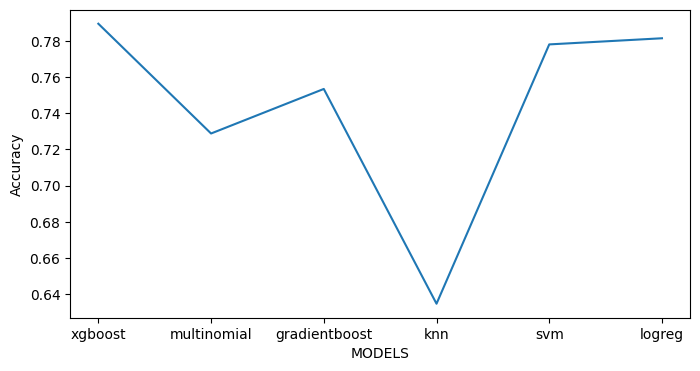

In [53]:
plt.figure(figsize=(8,4))
sns.lineplot(x = 'MODELS', y = 'Accuracy', data = dfmv)

In [64]:
cuisine = final_cuisine_predictor(["bread","salt","eggs","jam", "butter"])

In [65]:
cuisine

'southern_us'

In [58]:
cuisine = final_cuisine_predictor(["beef","tomato","oregano"])

In [59]:
cuisine

'italian'